In [1]:
import json
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.api as sm
import matplotlib.pyplot as plt

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#### import the data

In [2]:
happiness_df = pd.read_csv("archive (1)/World Happiness Report.csv")
happiness_df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


#### let's explore it a little bit...

checking the correlation will allow us to see which variables are most commonly related. this allows us to check to see which things relate to "Life Ladder", and also which independent variables relate to each other.

In [3]:
happiness_df.corr(numeric_only=True)

,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
Year,1.000000,0.045943,0.077772,-0.029750,0.163500,0.234105,0.005726,-0.081358,0.019182,0.205369,0.012638
Life Ladder,0.045943,1.000000,0.784871,0.721663,0.713493,0.534532,0.181658,-0.431569,0.518207,-0.339992,-0.081887
Log GDP Per Capita,0.077772,0.784871,1.000000,0.683619,0.818126,0.367560,-0.000800,-0.352884,0.237986,-0.247560,-0.188351
Social Support,-0.029750,0.721663,0.683619,1.000000,0.597682,0.409439,0.068593,-0.222584,0.431139,-0.441800,-0.169573
Healthy Life Expectancy At Birth,0.163500,0.713493,0.818126,0.597682,1.000000,0.373448,0.010876,-0.299055,0.223119,-0.140726,-0.178003
Freedom To Make Life Choices,0.234105,0.534532,0.367560,0.409439,0.373448,1.000000,0.325107,-0.476537,0.578752,-0.275470,0.408533
Generosity,0.005726,0.181658,-0.000800,0.068593,0.010876,0.325107,1.000000,-0.279494,0.307140,-0.080837,0.294399
Perceptions Of Corruption,-0.081358,-0.431569,-0.352884,-0.222584,-0.299055,-0.476537,-0.279494,1.000000,-0.280620,0.266267,-0.460789
Positive Affect,0.019182,0.518207,0.237986,0.431139,0.223119,0.578752,0.307140,-0.280620,1.000000,-0.330236,0.123241
Negative Affect,0.205369,-0.339992,-0.247560,-0.441800,-0.140726,-0.275470,-0.080837,0.266267,-0.330236,1.000000,-0.125631


we can also do a basic linear regression model with single variables to see what the R-value is of each indepedent variable against the dependent variable

In [4]:
happiness_df = happiness_df.dropna()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numbers_df = happiness_df.select_dtypes(include=numerics)

In [5]:
score_dict = {}

for variable in numbers_df.columns:
    temp_df = numbers_df.copy()
    lr = linear_model.LinearRegression()
    lr.fit(temp_df[[variable]], temp_df["Life Ladder"])
    score_dict[variable] = {"score": lr.score(temp_df[[variable]], numbers_df["Life Ladder"])}

print(json.dumps(score_dict, indent=4))

{
    "Year": {
        "score": 0.0051478832185841705
    },
    "Life Ladder": {
        "score": 1.0
    },
    "Log GDP Per Capita": {
        "score": 0.6281698077144785
    },
    "Social Support": {
        "score": 0.5192853987535684
    },
    "Healthy Life Expectancy At Birth": {
        "score": 0.5404614758255641
    },
    "Freedom To Make Life Choices": {
        "score": 0.2940861329423261
    },
    "Generosity": {
        "score": 0.03753479127663817
    },
    "Perceptions Of Corruption": {
        "score": 0.24222475409085542
    },
    "Positive Affect": {
        "score": 0.26300717570566623
    },
    "Negative Affect": {
        "score": 0.09594787291010265
    },
    "Confidence In National Government": {
        "score": 0.0047124322248690564
    }
}


We can actually add the correlation to this now, too...

In [6]:
for variable in numbers_df.columns:
    lr = linear_model.LinearRegression()
    lr.fit(numbers_df[[variable]], numbers_df["Life Ladder"])
    score_dict[variable].update(
        {"correlation": numbers_df["Life Ladder"].corr(numbers_df[variable])}
    )

print(json.dumps(score_dict, indent=4))

{
    "Year": {
        "score": 0.0051478832185841705,
        "correlation": 0.07174875064127634
    },
    "Life Ladder": {
        "score": 1.0,
        "correlation": 1.0
    },
    "Log GDP Per Capita": {
        "score": 0.6281698077144785,
        "correlation": 0.7925716420075085
    },
    "Social Support": {
        "score": 0.5192853987535684,
        "correlation": 0.7206145979326039
    },
    "Healthy Life Expectancy At Birth": {
        "score": 0.5404614758255641,
        "correlation": 0.7351608503079881
    },
    "Freedom To Make Life Choices": {
        "score": 0.2940861329423261,
        "correlation": 0.5422970891885057
    },
    "Generosity": {
        "score": 0.03753479127663817,
        "correlation": 0.1937389771745434
    },
    "Perceptions Of Corruption": {
        "score": 0.24222475409085542,
        "correlation": -0.49216334086444846
    },
    "Positive Affect": {
        "score": 0.26300717570566623,
        "correlation": 0.5128422522624927
    }

let's try these variables to start...

In [7]:
columns = [
    "Positive Affect", 
    "Freedom To Make Life Choices",
    "Healthy Life Expectancy At Birth",
    "Social Support",
    "Log GDP Per Capita",
]

here are some easy ways to train and test the models!

In [8]:
def train_model(df, cols):
    X = df[cols]
    y = df["Life Ladder"]
    model = sm.OLS(y, X).fit()
    return model

def test_model(df, cols, model):
    X = df[cols]
    df_p = df
    df_p = df_p.assign(predicted_life_ladder=model.predict(X))
    df_p = df_p.assign(error=df_p.predicted_life_ladder - df_p["Life Ladder"])
    return df_p

def compute_rmse(df):
    return np.sqrt(np.square(df.error).mean())

lets split the data into a train and test dataset

In [9]:
train_df, test_df = train_test_split(happiness_df, test_size=0.75, random_state=58)

let's try training the model now!

In [10]:
model = train_model(train_df, columns)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Life Ladder   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              5897.
Date:                Mon, 31 Jul 2023   Prob (F-statistic):                        0.00
Time:                        12:11:23   Log-Likelihood:                         -420.58
No. Observations:                 420   AIC:                                      851.2
Df Residuals:                     415   BIC:                                      871.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Positive Affect                      0.8214      0.360      2.281      0.023       0.114       1.529
Freedom To Make Life Choices         0.9881      0.284      3.475      0.001       0.429       1.547
Healthy Life Expectancy At Birth    -0.0258      0.008     -3.045      0.002      -0.042      -0.009
Social Support                       1.7565      0.397      4.422      0.000       0.976       2.537
Log GDP Per Capita                   0.4751      0.061      7.843      0.000       0.356       0.594
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                2.126
Skew:                          -0.174   Prob(JB):                        0.345
Kurtosis:                       3.020   Cond. No.                         888.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
predict_df = test_model(train_df, columns, model)

print("RMSE:", compute_rmse(predict_df))
print("Correlation:", predict_df["Life Ladder"].corr(predict_df["predicted_life_ladder"]))

RMSE: 0.6586462588002616
Correlation: 0.8544157928721338


85% correlation is really good! we can try doing some feature engineering to see if we can get anything better

feature engineering is usually manipulating the independent variables you have access to, to see if combining or dividing them yields better variables

let's try a brute force method here

In [12]:
columns_list = numbers_df.columns
interactions = list(combinations(columns_list, 2))
interactions

[('Year', 'Life Ladder'),
 ('Year', 'Log GDP Per Capita'),
 ('Year', 'Social Support'),
 ('Year', 'Healthy Life Expectancy At Birth'),
 ('Year', 'Freedom To Make Life Choices'),
 ('Year', 'Generosity'),
 ('Year', 'Perceptions Of Corruption'),
 ('Year', 'Positive Affect'),
 ('Year', 'Negative Affect'),
 ('Year', 'Confidence In National Government'),
 ('Life Ladder', 'Log GDP Per Capita'),
 ('Life Ladder', 'Social Support'),
 ('Life Ladder', 'Healthy Life Expectancy At Birth'),
 ('Life Ladder', 'Freedom To Make Life Choices'),
 ('Life Ladder', 'Generosity'),
 ('Life Ladder', 'Perceptions Of Corruption'),
 ('Life Ladder', 'Positive Affect'),
 ('Life Ladder', 'Negative Affect'),
 ('Life Ladder', 'Confidence In National Government'),
 ('Log GDP Per Capita', 'Social Support'),
 ('Log GDP Per Capita', 'Healthy Life Expectancy At Birth'),
 ('Log GDP Per Capita', 'Freedom To Make Life Choices'),
 ('Log GDP Per Capita', 'Generosity'),
 ('Log GDP Per Capita', 'Perceptions Of Corruption'),
 ('Log 

In [13]:
y = numbers_df["Life Ladder"]

for variable in interactions:
   temp_df = numbers_df.copy()
   var_1 = variable[0]
   var_2 = variable[1]
   temp_df['int'] = temp_df[var_1] ** 3
   lr1 = linear_model.LinearRegression()
   lr1.fit(temp_df[['int']], y)
   score_dict[f"{var_1} ^3 "] = {"score": lr1.score(temp_df[['int']], y)}
   score_dict[f"{var_1} ^3 "].update({"correlation": temp_df['int'].corr(y)})
   numbers_df[f"{var_1} ^3 "] = temp_df['int']

print(json.dumps(score_dict, indent=4))

{
    "Year": {
        "score": 0.0051478832185841705,
        "correlation": 0.07174875064127634
    },
    "Life Ladder": {
        "score": 1.0,
        "correlation": 1.0
    },
    "Log GDP Per Capita": {
        "score": 0.6281698077144785,
        "correlation": 0.7925716420075085
    },
    "Social Support": {
        "score": 0.5192853987535684,
        "correlation": 0.7206145979326039
    },
    "Healthy Life Expectancy At Birth": {
        "score": 0.5404614758255641,
        "correlation": 0.7351608503079881
    },
    "Freedom To Make Life Choices": {
        "score": 0.2940861329423261,
        "correlation": 0.5422970891885057
    },
    "Generosity": {
        "score": 0.03753479127663817,
        "correlation": 0.1937389771745434
    },
    "Perceptions Of Corruption": {
        "score": 0.24222475409085542,
        "correlation": -0.49216334086444846
    },
    "Positive Affect": {
        "score": 0.26300717570566623,
        "correlation": 0.5128422522624927
    }

In [14]:
y = numbers_df["Life Ladder"]

for variable in interactions:
   temp_df = numbers_df.copy()
   var_1 = variable[0]
   var_2 = variable[1]
   temp_df['int'] = (temp_df[var_1] ** 2) ** 0.25
   lr1 = linear_model.LinearRegression()
   lr1.fit(temp_df[['int']], y)
   score_dict[f"{var_1} ^ 0.5"] = {"score": lr1.score(temp_df[['int']], y)}
   score_dict[f"{var_1} ^ 0.5"].update({"correlation": temp_df['int'].corr(y)})
   numbers_df[f"{var_1} ^ 0.5"] = temp_df['int']

print(json.dumps(score_dict, indent=4))

{
    "Year": {
        "score": 0.0051478832185841705,
        "correlation": 0.07174875064127634
    },
    "Life Ladder": {
        "score": 1.0,
        "correlation": 1.0
    },
    "Log GDP Per Capita": {
        "score": 0.6281698077144785,
        "correlation": 0.7925716420075085
    },
    "Social Support": {
        "score": 0.5192853987535684,
        "correlation": 0.7206145979326039
    },
    "Healthy Life Expectancy At Birth": {
        "score": 0.5404614758255641,
        "correlation": 0.7351608503079881
    },
    "Freedom To Make Life Choices": {
        "score": 0.2940861329423261,
        "correlation": 0.5422970891885057
    },
    "Generosity": {
        "score": 0.03753479127663817,
        "correlation": 0.1937389771745434
    },
    "Perceptions Of Corruption": {
        "score": 0.24222475409085542,
        "correlation": -0.49216334086444846
    },
    "Positive Affect": {
        "score": 0.26300717570566623,
        "correlation": 0.5128422522624927
    }

In [15]:
y = numbers_df["Life Ladder"]

for variable in interactions:
   temp_df = numbers_df.copy()
   var_1 = variable[0]
   var_2 = variable[1]
   temp_df['int'] = temp_df[var_1] * temp_df[var_2]
   lr1 = linear_model.LinearRegression()
   lr1.fit(temp_df[['int']], y)
   score_dict[f"{var_1} x {var_2}"] = {"score": lr1.score(temp_df[['int']], y)}
   score_dict[f"{var_1} x {var_2}"].update({"correlation": temp_df['int'].corr(y)})
   numbers_df[f"{var_1} x {var_2}"] = temp_df['int']

print(json.dumps(score_dict, indent=4))

{
    "Year": {
        "score": 0.0051478832185841705,
        "correlation": 0.07174875064127634
    },
    "Life Ladder": {
        "score": 1.0,
        "correlation": 1.0
    },
    "Log GDP Per Capita": {
        "score": 0.6281698077144785,
        "correlation": 0.7925716420075085
    },
    "Social Support": {
        "score": 0.5192853987535684,
        "correlation": 0.7206145979326039
    },
    "Healthy Life Expectancy At Birth": {
        "score": 0.5404614758255641,
        "correlation": 0.7351608503079881
    },
    "Freedom To Make Life Choices": {
        "score": 0.2940861329423261,
        "correlation": 0.5422970891885057
    },
    "Generosity": {
        "score": 0.03753479127663817,
        "correlation": 0.1937389771745434
    },
    "Perceptions Of Corruption": {
        "score": 0.24222475409085542,
        "correlation": -0.49216334086444846
    },
    "Positive Affect": {
        "score": 0.26300717570566623,
        "correlation": 0.5128422522624927
    }

In [16]:
for key in score_dict.keys():
    score_dict[key].update({"combined": np.average(
        [score_dict[key]["score"], score_dict[key]["correlation"]])}
    )

print(json.dumps(score_dict, indent=4))

{
    "Year": {
        "score": 0.0051478832185841705,
        "correlation": 0.07174875064127634,
        "combined": 0.038448316929930254
    },
    "Life Ladder": {
        "score": 1.0,
        "correlation": 1.0,
        "combined": 1.0
    },
    "Log GDP Per Capita": {
        "score": 0.6281698077144785,
        "correlation": 0.7925716420075085,
        "combined": 0.7103707248609935
    },
    "Social Support": {
        "score": 0.5192853987535684,
        "correlation": 0.7206145979326039,
        "combined": 0.6199499983430861
    },
    "Healthy Life Expectancy At Birth": {
        "score": 0.5404614758255641,
        "correlation": 0.7351608503079881,
        "combined": 0.6378111630667761
    },
    "Freedom To Make Life Choices": {
        "score": 0.2940861329423261,
        "correlation": 0.5422970891885057,
        "combined": 0.4181916110654159
    },
    "Generosity": {
        "score": 0.03753479127663817,
        "correlation": 0.1937389771745434,
        "comb

In [17]:
keys = list(score_dict.keys())
values = [score["combined"] for score in score_dict.values()]
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
 
print(json.dumps(sorted_dict, indent=4))

{
    "Life Ladder": 1.0,
    "Year x Life Ladder": 0.9999149043749638,
    "Life Ladder ^ 0.5": 0.9969450365585975,
    "Life Ladder ^3 ": 0.964634447332098,
    "Life Ladder x Healthy Life Expectancy At Birth": 0.9604972407845338,
    "Life Ladder x Log GDP Per Capita": 0.9586713979837236,
    "Life Ladder x Social Support": 0.9416596365343406,
    "Life Ladder x Positive Affect": 0.8697452426399582,
    "Life Ladder x Freedom To Make Life Choices": 0.860992958777492,
    "Log GDP Per Capita x Social Support": 0.7575567385763021,
    "Social Support x Healthy Life Expectancy At Birth": 0.7532676941256362,
    "Log GDP Per Capita x Positive Affect": 0.7310206517842504,
    "Log GDP Per Capita x Healthy Life Expectancy At Birth": 0.7299493606743718,
    "Log GDP Per Capita ^3 ": 0.7261628879443557,
    "Log GDP Per Capita": 0.7103707248609935,
    "Year x Log GDP Per Capita": 0.7100103485284619,
    "Log GDP Per Capita ^ 0.5": 0.7034541574953606,
    "Log GDP Per Capita x Freedom To Ma

maybe we can try these variables?

In [18]:
train_df, test_df = train_test_split(numbers_df, test_size=0.75, random_state=58)

In [19]:
new_columns = [
    "Log GDP Per Capita x Social Support",
    "Healthy Life Expectancy At Birth ^3 ",
    "Freedom To Make Life Choices x Positive Affect"
]

In [20]:
new_model = train_model(train_df, new_columns)
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Life Ladder   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.154e+04
Date:                Mon, 31 Jul 2023   Prob (F-statistic):                        0.00
Time:                        12:11:27   Log-Likelihood:                         -388.22
No. Observations:                 420   AIC:                                      782.4
Df Residuals:                     417   BIC:                                      794.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Log GDP Per Capita x Social Support                0.3730      0.026     14.187      0.000       0.321       0.425
Healthy Life Expectancy At Birth ^3             4.783e-06   6.72e-07      7.117      0.000    3.46e-06     6.1e-06
Freedom To Make Life Choices x Positive Affect     2.6142      0.215     12.149      0.000       2.191       3.037
==============================================================================
Omnibus:                       60.885   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.836
Skew:                           0.757   Prob(JB):                     1.17e-30
Kurtosis:                       5.363   Cond. No.                     1.95e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
predict_df = test_model(train_df, new_columns, new_model)

print("RMSE:", compute_rmse(predict_df))
print("Correlation:", predict_df["Life Ladder"].corr(predict_df["predicted_life_ladder"]))

RMSE: 0.6098161128875539
Correlation: 0.8786691000746142


We see that we bumped up the correlation to 87%, even better! And the RSME went down too! 

### Let's look at the feature selection stuff from Sklearn

In [22]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression\

cols = [column for column in score_dict.keys() if "Life Ladder" not in column]

X = train_df[cols]
y = train_df["Life Ladder"]

# select top X features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k=10)
selector.fit(X, y.values.ravel())
X_columns_SKB = list(X.columns[selector.get_support()])

X_columns_SKB

['Log GDP Per Capita',
 'Log GDP Per Capita ^3 ',
 'Log GDP Per Capita ^ 0.5',
 'Year x Log GDP Per Capita',
 'Log GDP Per Capita x Social Support',
 'Log GDP Per Capita x Healthy Life Expectancy At Birth',
 'Log GDP Per Capita x Freedom To Make Life Choices',
 'Log GDP Per Capita x Positive Affect',
 'Social Support x Healthy Life Expectancy At Birth',
 'Social Support x Freedom To Make Life Choices']

In [23]:
X_columns_SKB = [
    # 'Log GDP Per Capita',
    # 'Healthy Life Expectancy At Birth',
    # 'Year x Log GDP Per Capita',
    # 'Year x Healthy Life Expectancy At Birth',
    # 'Log GDP Per Capita x Social Support',
    'Log GDP Per Capita x Healthy Life Expectancy At Birth',
    # 'Log GDP Per Capita x Freedom To Make Life Choices',
    # 'Log GDP Per Capita x Positive Affect',
    # 'Social Support x Healthy Life Expectancy At Birth',
    'Social Support x Freedom To Make Life Choices'
 ]

### Retest it 

In [24]:
new_model = train_model(train_df, X_columns_SKB)
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Life Ladder   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.789e+04
Date:                Mon, 31 Jul 2023   Prob (F-statistic):                        0.00
Time:                        12:11:28   Log-Likelihood:                         -381.93
No. Observations:                 420   AIC:                                      767.9
Df Residuals:                     418   BIC:                                      775.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Log GDP Per Capita x Healthy Life Expectancy At Birth     0.0064      0.000     27.864      0.000       0.006       0.007
Social Support x Freedom To Make Life Choices             2.6353      0.219     12.032      0.000       2.205       3.066
==============================================================================
Omnibus:                       16.290   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.182
Skew:                           0.370   Prob(JB):                     4.14e-05
Kurtosis:                       3.778   Cond. No.                     4.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
predict_df = test_model(train_df, X_columns_SKB, new_model)

print("RMSE:", compute_rmse(predict_df))
print("Correlation:", predict_df["Life Ladder"].corr(predict_df["predicted_life_ladder"]))

RMSE: 0.600740926330158
Correlation: 0.8664091616161353


### Bringing in external data

In [26]:
raw_fertility_df = pd.read_excel("tfr-by-gapminder.xlsx", sheet_name=1)
raw_fertility_df

,geo.name,indicator.name,geo,indicator,1800,1801,1802,1803,1804,1805,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Abkhazia,Total fertility rate,abkh,tfr,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Total fertility rate,afg,tfr,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Akrotiri and Dhekelia,Total fertility rate,akr_a_dhe,tfr,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Total fertility rate,alb,tfr,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Algeria,Total fertility rate,dza,tfr,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Northern Marianas,Total fertility rate,n_marianas,tfr,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,South Georgia and the South Sandwich Islands,Total fertility rate,sgero_a_ssandw,tfr,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,US Minor Outlying Islands,Total fertility rate,usa_minor_out_isl,tfr,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Virgin Islands,Total fertility rate,virg_isl,tfr,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
fertility_df = raw_fertility_df[["geo.name", 2016]].rename(columns={"geo.name": "Country Name", 2016: "Fertility Rate"})
fertility_df

,Country Name,Fertility Rate
0,Abkhazia,NaN
1,Afghanistan,4.64
2,Akrotiri and Dhekelia,NaN
3,Albania,1.71
4,Algeria,2.78
...,...,...
270,Northern Marianas,NaN
271,South Georgia and the South Sandwich Islands,NaN
272,US Minor Outlying Islands,NaN
273,Virgin Islands,NaN


In [28]:
combined_df = pd.merge(happiness_df, fertility_df)
combined_df

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Fertility Rate
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,4.64
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,4.64
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,4.64
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,4.64
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,4.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,Zimbabwe,Sub-Saharan Africa,2017,3.638300,7.754387,0.754147,52.150002,0.752826,-0.080725,0.751208,0.733641,0.224051,0.682647,3.76
1610,Zimbabwe,Sub-Saharan Africa,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726,0.550508,3.76
1611,Zimbabwe,Sub-Saharan Africa,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,0.456455,3.76
1612,Zimbabwe,Sub-Saharan Africa,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736,0.577302,3.76


In [29]:
numbers_df = combined_df.select_dtypes(include=numerics)
score_dict = {}

for variable in numbers_df.columns:
    temp_df = numbers_df.copy()
    lr = linear_model.LinearRegression()
    lr.fit(temp_df[[variable]], temp_df["Life Ladder"])
    score_dict[variable] = {"score": lr.score(temp_df[[variable]], numbers_df["Life Ladder"])}

print(json.dumps(score_dict, indent=4))

{
    "Year": {
        "score": 0.0048089938640693
    },
    "Life Ladder": {
        "score": 1.0
    },
    "Log GDP Per Capita": {
        "score": 0.6312612709625487
    },
    "Social Support": {
        "score": 0.5246476429232784
    },
    "Healthy Life Expectancy At Birth": {
        "score": 0.5398453760503432
    },
    "Freedom To Make Life Choices": {
        "score": 0.30600144452139455
    },
    "Generosity": {
        "score": 0.03895921198883434
    },
    "Perceptions Of Corruption": {
        "score": 0.2514971792609363
    },
    "Positive Affect": {
        "score": 0.26404435150713723
    },
    "Negative Affect": {
        "score": 0.0993745881642103
    },
    "Confidence In National Government": {
        "score": 0.0037497060969370333
    },
    "Fertility Rate": {
        "score": 0.35698354902135243
    }
}


In [30]:
for variable in numbers_df.columns:
    lr = linear_model.LinearRegression()
    lr.fit(numbers_df[[variable]], numbers_df["Life Ladder"])
    score_dict[variable].update(
        {"correlation": numbers_df["Life Ladder"].corr(numbers_df[variable])}
    )

print(json.dumps(score_dict, indent=4))

{
    "Year": {
        "score": 0.0048089938640693,
        "correlation": 0.06934690954952095
    },
    "Life Ladder": {
        "score": 1.0,
        "correlation": 1.0
    },
    "Log GDP Per Capita": {
        "score": 0.6312612709625487,
        "correlation": 0.7945195220776826
    },
    "Social Support": {
        "score": 0.5246476429232784,
        "correlation": 0.7243256470147101
    },
    "Healthy Life Expectancy At Birth": {
        "score": 0.5398453760503432,
        "correlation": 0.7347417070306703
    },
    "Freedom To Make Life Choices": {
        "score": 0.30600144452139455,
        "correlation": 0.5531739731055636
    },
    "Generosity": {
        "score": 0.03895921198883434,
        "correlation": 0.19738088050476046
    },
    "Perceptions Of Corruption": {
        "score": 0.2514971792609363,
        "correlation": -0.501494944402171
    },
    "Positive Affect": {
        "score": 0.26404435150713723,
        "correlation": 0.5138524608359266
    },
  

### Lets look at taking the square root or square of a variable

In [31]:
for col in numbers_df.columns:
    numbers_df[col + " ^ Squared"] = numbers_df[col].pow(2)
    numbers_df[col + " ^ Sqrt"] = numbers_df[col].pow(1/2)

numbers_df

,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,...,Perceptions Of Corruption ^ Squared,Perceptions Of Corruption ^ Sqrt,Positive Affect ^ Squared,Positive Affect ^ Sqrt,Negative Affect ^ Squared,Negative Affect ^ Sqrt,Confidence In National Government ^ Squared,Confidence In National Government ^ Sqrt,Fertility Rate ^ Squared,Fertility Rate ^ Sqrt
0,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,...,0.777371,0.938982,0.171642,0.643659,0.066665,0.508129,0.374632,0.782350,21.5296,2.154066
1,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,...,0.722560,0.921974,0.231767,0.693845,0.056213,0.486921,0.373988,0.782014,21.5296,2.154066
2,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,...,0.499518,0.840694,0.267193,0.718962,0.075803,0.524713,0.089615,0.547136,21.5296,2.154066
3,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,...,0.534520,0.855049,0.230241,0.692701,0.071382,0.516889,0.094486,0.554424,21.5296,2.154066
4,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,...,0.601586,0.880693,0.376398,0.783271,0.071781,0.517609,0.189608,0.659879,21.5296,2.154066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,2017,3.638300,7.754387,0.754147,52.150002,0.752826,-0.080725,0.751208,0.733641,0.224051,...,0.564313,0.866723,0.538230,0.856529,0.050199,0.473341,0.466007,0.826224,14.1376,1.939072
1610,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726,...,0.712688,0.918808,0.432337,0.810878,0.044828,0.460137,0.303059,0.741962,14.1376,1.939072
1611,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,...,0.689983,0.911401,0.433535,0.811439,0.055392,0.485133,0.208351,0.675615,14.1376,1.939072
1612,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736,...,0.621768,0.887988,0.436469,0.812809,0.119534,0.587994,0.333277,0.759804,14.1376,1.939072


### Retest it 

In [32]:
train_df, test_df = train_test_split(combined_df, test_size=0.75, random_state=58)

### Let's check the correlation

In [33]:
numbers_df.corr(numeric_only=True)["Life Ladder"].sort_values(ascending=False)

Life Ladder                                    1.000000
Life Ladder ^ Sqrt                             0.997969
Life Ladder ^ Squared                          0.993288
Log GDP Per Capita ^ Squared                   0.802465
Log GDP Per Capita                             0.794520
Log GDP Per Capita ^ Sqrt                      0.789081
Healthy Life Expectancy At Birth ^ Squared     0.758752
Social Support ^ Squared                       0.747078
Healthy Life Expectancy At Birth               0.734742
Social Support                                 0.724326
Healthy Life Expectancy At Birth ^ Sqrt        0.709770
Social Support ^ Sqrt                          0.708488
Freedom To Make Life Choices ^ Squared         0.570541
Freedom To Make Life Choices                   0.553174
Freedom To Make Life Choices ^ Sqrt            0.540870
Positive Affect ^ Squared                      0.517140
Positive Affect                                0.513852
Positive Affect ^ Sqrt                         0

In [34]:
combined_columns = [
    "Positive Affect", 
    "Freedom To Make Life Choices",
    "Healthy Life Expectancy At Birth",
    "Social Support",
    "Log GDP Per Capita",
    'Fertility Rate',
]

In [35]:
model = train_model(train_df, combined_columns)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Life Ladder   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              6101.
Date:                Mon, 31 Jul 2023   Prob (F-statistic):                        0.00
Time:                        12:11:33   Log-Likelihood:                         -361.27
No. Observations:                 403   AIC:                                      734.5
Df Residuals:                     397   BIC:                                      758.5
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Positive Affect                      2.1525      0.366      5.874      0.000       1.432       2.873
Freedom To Make Life Choices         1.3028      0.273      4.773      0.000       0.766       1.839
Healthy Life Expectancy At Birth    -0.0078      0.008     -1.009      0.313      -0.023       0.007
Social Support                       1.4223      0.410      3.467      0.001       0.616       2.229
Log GDP Per Capita                   0.3381      0.060      5.642      0.000       0.220       0.456
Fertility Rate                      -0.2580      0.023    -11.362      0.000      -0.303      -0.213
==============================================================================
Omnibus:                       18.112   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.241
Skew:                          -0.340   Prob(JB):                     1.22e-06
Kurtosis:                       4.077   Cond. No.                         986.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
predict_df = test_model(train_df, combined_columns, model)

print("RMSE:", compute_rmse(predict_df))
print("Correlation:", predict_df["Life Ladder"].corr(predict_df["predicted_life_ladder"]))

RMSE: 0.593048248705372
Correlation: 0.8678868004767609


### More external data

In [37]:
raw_owid_df = pd.read_excel("owid_education_idx.xlsx")
raw_owid_df

,country,1870,1871,1872,1873,1874,1875,1876,1877,1878,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,...,20.0,20.7,21.3,22.0,22.7,23.3,23.3,24.0,24.0,25.3
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.7,31.3,31.3,31.3,32.0,32.7,32.7,33.3,34.0,34.0
2,Albania,0.1330,NaN,NaN,NaN,NaN,0.1330,NaN,NaN,NaN,...,61.3,62.0,62.0,62.0,64.0,64.7,64.7,64.7,66.7,66.7
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.3,67.3,67.3,68.0,68.0,68.0,68.0,68.0,68.0,68.0
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,64.7,66.0,66.7,68.0,68.7,70.0,70.7,72.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.3,66.0,66.7,68.0,68.0,68.7,68.7,68.7,68.7,68.7
185,Yemen,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,...,15.3,16.7,17.3,18.7,20.0,20.0,20.0,20.0,20.0,20.0
186,South Africa,3.4700,NaN,NaN,NaN,NaN,4.1300,NaN,NaN,NaN,...,64.7,67.3,66.7,66.0,65.3,66.0,66.7,67.3,67.3,67.3
187,Zambia,0.0667,NaN,NaN,NaN,NaN,0.0667,NaN,NaN,NaN,...,43.3,43.3,44.0,44.7,44.7,45.3,46.0,46.0,46.7,46.7


In [38]:
raw_pop_df = pd.read_excel("population_growth_annual_percent.xlsx")
raw_pop_df

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,2.18,1.55,1.39,1.22,1.03,0.862,0.389,−0.0857,−0.237,...,0.81,0.749,0.692,0.638,0.59,0.537,0.495,0.452,0.134,−0.045
1,Afghanistan,1.93,2.01,2.08,2.14,2.22,2.25,2.29,2.35,2.38,...,4.08,3.47,3.66,3.12,2.58,2.87,2.89,2.91,3.13,2.85
2,Angola,1.56,1.46,1.41,1.3,1.11,0.876,0.697,0.696,1.02,...,3.76,3.74,3.68,3.62,3.59,3.55,3.46,3.4,3.27,3.17
3,Albania,3.12,3.06,2.95,2.88,2.75,2.63,2.63,2.84,2.9,...,−0.165,−0.183,−0.207,−0.291,−0.16,−0.092,−0.247,−0.426,−0.574,−0.927
4,Andorra,7.87,7.52,7.22,6.94,6.65,7,7.92,8.13,7.72,...,0.63,0.497,0.355,0.174,1.1,1.77,1.58,1.76,1.76,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Samoa,3.03,2.82,2.67,2.53,2.5,2.43,2.07,1.75,1.65,...,0.899,0.912,0.905,0.895,0.965,1.01,0.993,1.05,1.42,1.77
213,Yemen,1.86,1.87,1.84,1.92,2.05,2.13,2.22,2.3,2.4,...,2.89,2.86,2.81,2.71,2.62,2.56,2.49,2.43,2.31,2.14
214,South Africa,2.8,2.98,3.03,3.06,3.09,3.09,3.09,3.09,3.06,...,1.33,1.36,1.58,2.07,0.972,0.387,1.23,1.3,1.22,0.999
215,Zambia,3.16,3.18,3.2,3.19,3.2,3.22,3.22,3.23,3.17,...,3.3,3.27,3.25,3.19,3.15,3.11,3.06,3.01,2.93,2.84


In [39]:
owid_df = raw_owid_df.melt(['country'], 
             var_name='year', 
             value_name='owid').rename(columns={"year":"Year", "country":"Country Name"})
owid_df

,Country Name,Year,owid
0,Afghanistan,1870,0.0667
1,Angola,1870,NaN
2,Albania,1870,0.1330
3,Andorra,1870,NaN
4,United Arab Emirates,1870,NaN
...,...,...,...
27967,Samoa,2017,68.7000
27968,Yemen,2017,20.0000
27969,South Africa,2017,67.3000
27970,Zambia,2017,46.7000


In [40]:
pop_df = raw_pop_df.melt(['country'], 
             var_name='year', 
             value_name='pop growth').rename(columns={"year":"Year", "country":"Country Name"})
pop_df

,Country Name,Year,pop growth
0,Aruba,1961,2.18
1,Afghanistan,1961,1.93
2,Angola,1961,1.56
3,Albania,1961,3.12
4,Andorra,1961,7.87
...,...,...,...
13232,Samoa,2021,1.77
13233,Yemen,2021,2.14
13234,South Africa,2021,0.999
13235,Zambia,2021,2.84


In [41]:
combined_df = pd.merge(combined_df, owid_df)
combined_df = pd.merge(combined_df, pop_df)
combined_df

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Fertility Rate,owid,pop growth
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,4.64,20.0,2
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,4.64,20.7,3.56
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,4.64,21.3,2.89
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,4.64,22.0,3.69
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,4.64,22.7,4.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,Zimbabwe,Sub-Saharan Africa,2013,4.690188,7.755187,0.799274,48.799999,0.575884,-0.089405,0.830937,0.623596,0.182288,0.527755,3.76,53.3,2.16
1170,Zimbabwe,Sub-Saharan Africa,2014,4.184451,7.748009,0.765839,50.000000,0.642034,-0.058242,0.820217,0.661307,0.239111,0.566209,3.76,54.7,2.19
1171,Zimbabwe,Sub-Saharan Africa,2015,3.703191,7.746680,0.735800,51.200001,0.667193,-0.107365,0.810457,0.639002,0.178861,0.590012,3.76,54.7,2.14
1172,Zimbabwe,Sub-Saharan Africa,2016,3.735400,7.734831,0.768425,51.674999,0.732971,-0.078541,0.723612,0.685256,0.208555,0.699344,3.76,54.7,2.08


In [42]:
cleaned_df = combined_df[~combined_df["owid"].isna()]
cleaned_df = cleaned_df[~cleaned_df["pop growth"].isna()]
## cleaned_df["pop growth"]=cleaned_df["pop growth"].str.replace("−","-").astype(float)
cleaned_df["pop growth"]=cleaned_df["pop growth"].apply(lambda x : float(x.replace("−", "-")) if "−" in x else float(x))
cleaned_df.head(50)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,Fertility Rate,owid,pop growth
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,4.64,20.0,2
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,4.64,20.7,3.56
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,4.64,21.3,2.89
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,4.64,22.0,3.69
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,4.64,22.7,4.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,Zimbabwe,Sub-Saharan Africa,2013,4.690188,7.755187,0.799274,48.799999,0.575884,-0.089405,0.830937,0.623596,0.182288,0.527755,3.76,53.3,2.16
1170,Zimbabwe,Sub-Saharan Africa,2014,4.184451,7.748009,0.765839,50.000000,0.642034,-0.058242,0.820217,0.661307,0.239111,0.566209,3.76,54.7,2.19
1171,Zimbabwe,Sub-Saharan Africa,2015,3.703191,7.746680,0.735800,51.200001,0.667193,-0.107365,0.810457,0.639002,0.178861,0.590012,3.76,54.7,2.14
1172,Zimbabwe,Sub-Saharan Africa,2016,3.735400,7.734831,0.768425,51.674999,0.732971,-0.078541,0.723612,0.685256,0.208555,0.699344,3.76,54.7,2.08


In [43]:
cleaned_df.dtypes

Country Name                          object
Regional Indicator                    object
Year                                  object
Life Ladder                          float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
Fertility Rate                       float64
owid                                 float64
pop growth                            object
dtype: object

In [44]:
numbers_df = cleaned_df.select_dtypes(include=numerics)
score_dict = {}

for variable in numbers_df.columns:
    temp_df = numbers_df.copy()
    lr = linear_model.LinearRegression()
    lr.fit(temp_df[[variable]], temp_df["Life Ladder"])
    score_dict[variable] = {"score": lr.score(temp_df[[variable]], numbers_df["Life Ladder"])}

print(json.dumps(score_dict, indent=4))

{
    "Life Ladder": {
        "score": 1.0
    },
    "Log GDP Per Capita": {
        "score": 0.6263714800055125
    },
    "Social Support": {
        "score": 0.4856276266037167
    },
    "Healthy Life Expectancy At Birth": {
        "score": 0.5324556447554616
    },
    "Freedom To Make Life Choices": {
        "score": 0.291479498724465
    },
    "Generosity": {
        "score": 0.05637403754825843
    },
    "Perceptions Of Corruption": {
        "score": 0.2452167343036794
    },
    "Positive Affect": {
        "score": 0.27452078547039604
    },
    "Negative Affect": {
        "score": 0.06421708342065324
    },
    "Confidence In National Government": {
        "score": 0.0032728320161981017
    },
    "Fertility Rate": {
        "score": 0.3556282750579094
    },
    "owid": {
        "score": 0.4042400531994903
    }
}


In [45]:
for variable in numbers_df.columns:
    lr = linear_model.LinearRegression()
    lr.fit(numbers_df[[variable]], numbers_df["Life Ladder"])
    score_dict[variable].update(
        {"correlation": numbers_df["Life Ladder"].corr(numbers_df[variable])}
    )

print(json.dumps(score_dict, indent=4))

{
    "Life Ladder": {
        "score": 1.0,
        "correlation": 1.0
    },
    "Log GDP Per Capita": {
        "score": 0.6263714800055125,
        "correlation": 0.7914363398312667
    },
    "Social Support": {
        "score": 0.4856276266037167,
        "correlation": 0.6968698778134385
    },
    "Healthy Life Expectancy At Birth": {
        "score": 0.5324556447554616,
        "correlation": 0.7296955836206364
    },
    "Freedom To Make Life Choices": {
        "score": 0.291479498724465,
        "correlation": 0.539888413215606
    },
    "Generosity": {
        "score": 0.05637403754825843,
        "correlation": 0.2374321746273205
    },
    "Perceptions Of Corruption": {
        "score": 0.2452167343036794,
        "correlation": -0.4951936331412991
    },
    "Positive Affect": {
        "score": 0.27452078547039604,
        "correlation": 0.5239473117312424
    },
    "Negative Affect": {
        "score": 0.06421708342065324,
        "correlation": -0.25341089838571085

In [46]:
for col in numbers_df.columns:
    numbers_df[col + " ^ Squared"] = numbers_df[col].pow(2)
    numbers_df[col + " ^ Sqrt"] = numbers_df[col].pow(1/2)

numbers_df

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government,...,Positive Affect ^ Squared,Positive Affect ^ Sqrt,Negative Affect ^ Squared,Negative Affect ^ Sqrt,Confidence In National Government ^ Squared,Confidence In National Government ^ Sqrt,Fertility Rate ^ Squared,Fertility Rate ^ Sqrt,owid ^ Squared,owid ^ Sqrt
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072,...,0.171642,0.643659,0.066665,0.508129,0.374632,0.782350,21.5296,2.154066,400.00,4.472136
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545,...,0.231767,0.693845,0.056213,0.486921,0.373988,0.782014,21.5296,2.154066,428.49,4.549725
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357,...,0.267193,0.718962,0.075803,0.524713,0.089615,0.547136,21.5296,2.154066,453.69,4.615192
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386,...,0.230241,0.692701,0.071382,0.516889,0.094486,0.554424,21.5296,2.154066,484.00,4.690416
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440,...,0.376398,0.783271,0.071781,0.517609,0.189608,0.659879,21.5296,2.154066,515.29,4.764452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,4.690188,7.755187,0.799274,48.799999,0.575884,-0.089405,0.830937,0.623596,0.182288,0.527755,...,0.388872,0.789681,0.033229,0.426952,0.278526,0.726468,14.1376,1.939072,2840.89,7.300685
1170,4.184451,7.748009,0.765839,50.000000,0.642034,-0.058242,0.820217,0.661307,0.239111,0.566209,...,0.437326,0.813208,0.057174,0.488990,0.320592,0.752468,14.1376,1.939072,2992.09,7.395945
1171,3.703191,7.746680,0.735800,51.200001,0.667193,-0.107365,0.810457,0.639002,0.178861,0.590012,...,0.408323,0.799376,0.031991,0.422920,0.348115,0.768123,14.1376,1.939072,2992.09,7.395945
1172,3.735400,7.734831,0.768425,51.674999,0.732971,-0.078541,0.723612,0.685256,0.208555,0.699344,...,0.469575,0.827802,0.043495,0.456678,0.489082,0.836268,14.1376,1.939072,2992.09,7.395945


In [47]:
train_df, test_df = train_test_split(numbers_df, test_size=0.75, random_state=58)

In [48]:
numbers_df.corr(numeric_only=True)["Life Ladder"].sort_values(ascending=False)

Life Ladder                                    1.000000
Life Ladder ^ Sqrt                             0.998224
Life Ladder ^ Squared                          0.993864
Log GDP Per Capita ^ Squared                   0.798321
Log GDP Per Capita                             0.791436
Log GDP Per Capita ^ Sqrt                      0.786711
Healthy Life Expectancy At Birth ^ Squared     0.758609
Healthy Life Expectancy At Birth               0.729696
Social Support ^ Squared                       0.723573
Healthy Life Expectancy At Birth ^ Sqrt        0.700184
Social Support                                 0.696870
Social Support ^ Sqrt                          0.678932
owid                                           0.635799
owid ^ Sqrt                                    0.628286
owid ^ Squared                                 0.627797
Freedom To Make Life Choices ^ Squared         0.560482
Freedom To Make Life Choices                   0.539888
Positive Affect ^ Squared                      0

In [49]:
combined_columns = [
    "Positive Affect ^ Squared", 
    "Freedom To Make Life Choices ^ Squared",
    "Healthy Life Expectancy At Birth ^ Squared",
    "Social Support ^ Squared",
    "Log GDP Per Capita ^ Squared",
    'owid'
]

In [50]:
model = train_model(train_df, combined_columns)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Life Ladder   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              4177.
Date:                Mon, 31 Jul 2023   Prob (F-statistic):                   1.03e-273
Time:                        12:11:35   Log-Likelihood:                         -259.48
No. Observations:                 290   AIC:                                      531.0
Df Residuals:                     284   BIC:                                      553.0
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Positive Affect ^ Squared                      2.0940      0.359      5.833      0.000       1.387       2.801
Freedom To Make Life Choices ^ Squared         0.4051      0.233      1.737      0.083      -0.054       0.864
Healthy Life Expectancy At Birth ^ Squared     0.0004   7.56e-05      5.134      0.000       0.000       0.001
Social Support ^ Squared                       0.9287      0.320      2.898      0.004       0.298       1.560
Log GDP Per Capita ^ Squared                   0.0275      0.004      6.335      0.000       0.019       0.036
owid                                          -0.0054      0.003     -1.702      0.090      -0.012       0.001
==============================================================================
Omnibus:                        1.257   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                0.992
Skew:                           0.051   Prob(JB):                        0.609
Kurtosis:                       3.268   Cond. No.                     4.85e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
predict_df = test_model(train_df, combined_columns, model)

print("RMSE:", compute_rmse(predict_df))
print("Correlation:", predict_df["Life Ladder"].corr(predict_df["predicted_life_ladder"]))

RMSE: 0.5920347297918634
Correlation: 0.8646717188951584


In [52]:
numbers_df[["Positive Affect ^ Squared", "Freedom To Make Life Choices ^ Squared", "Healthy Life Expectancy At Birth ^ Squared", "Social Support ^ Squared", "Log GDP Per Capita ^ Squared", 'owid']].corr()

,Positive Affect ^ Squared,Freedom To Make Life Choices ^ Squared,Healthy Life Expectancy At Birth ^ Squared,Social Support ^ Squared,Log GDP Per Capita ^ Squared,owid
Positive Affect ^ Squared,1.000000,0.577463,0.296257,0.479999,0.261470,0.092763
Freedom To Make Life Choices ^ Squared,0.577463,1.000000,0.423910,0.458179,0.422218,0.311961
Healthy Life Expectancy At Birth ^ Squared,0.296257,0.423910,1.000000,0.617419,0.858257,0.743928
Social Support ^ Squared,0.479999,0.458179,0.617419,1.000000,0.712100,0.632685
Log GDP Per Capita ^ Squared,0.261470,0.422218,0.858257,0.712100,1.000000,0.853630
owid,0.092763,0.311961,0.743928,0.632685,0.853630,1.000000


In [53]:
covid_df= pd.read_html("https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory")

In [54]:
covid_df[12]

,Unnamed: 0,Country,Deaths / million,Deaths,Cases
0,NaN,World[a],871,6952509,768559963
1,NaN,Peru,6498,221261,4515610
2,NaN,Bulgaria,5661,38393,1298786
3,NaN,Bosnia and Herzegovina,5057,16352,403052
4,NaN,Hungary,4895,48799,2203222
...,...,...,...,...,...
235,NaN,Turkmenistan,—,0,0
236,NaN,Vatican City,—,0,26
237,NaN,Tokelau,—,0,80
238,NaN,"Saint Helena, Ascension and Tristan da Cunha",—,—,2166


In [55]:
density_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population_density")

In [56]:
dens = density_df[1]
dens

,Country (or area),1950,1960,1970,1980,1990,2000,2010,2018
0,Afghanistan *,11.9,13.8,17.0,20.3,18.8,30.8,44.1,55.7
1,Albania *,46.1,59.7,78.5,97.9,119.8,113.9,107.3,107.1
2,Algeria *,3.7,4.7,6.1,8.1,10.9,13.1,15.2,17.6
3,American Samoa * (USA),94.7,100.1,136.5,162.3,235.2,287.6,278.2,278.4
4,Andorra *,13.2,28.5,51.7,76.7,116.0,139.1,179.7,163.7
...,...,...,...,...,...,...,...,...,...
227,Wallis and Futuna * (France),50.0,61.1,63.2,80.2,99.1,103.6,95.9,83.4
228,Western Sahara *[7],0.1,0.1,0.3,0.6,0.8,1.2,1.8,2.1
229,Yemen *,8.3,9.8,11.7,15.4,22.8,33.9,44.7,54.8
230,Zambia *,3.1,4.1,5.6,7.9,10.8,14.2,18.6,23.7


In [57]:
pd.DataFrame(dens)
dens_df = dens.melt(['Country (or area)'], 
             var_name='year', 
             value_name='density').rename(columns={"year":"Year", "Country (or area)":"Country Name"})
dens_df

,Country Name,Year,density
0,Afghanistan *,1950,11.9
1,Albania *,1950,46.1
2,Algeria *,1950,3.7
3,American Samoa * (USA),1950,94.7
4,Andorra *,1950,13.2
...,...,...,...
1851,Wallis and Futuna * (France),2018,83.4
1852,Western Sahara *[7],2018,2.1
1853,Yemen *,2018,54.8
1854,Zambia *,2018,23.7


In [58]:
dens_df['Country Name'] = dens_df['Country Name'].str.replace('*','')
dens_df.dtypes

Country Name     object
Year             object
density         float64
dtype: object

In [59]:
combined_df.dtypes

Country Name                          object
Regional Indicator                    object
Year                                  object
Life Ladder                          float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
Fertility Rate                       float64
owid                                 float64
pop growth                            object
dtype: object

In [60]:
## combined_df = pd.merge(combined_df, dens_df)
## combined_df

### Visuals

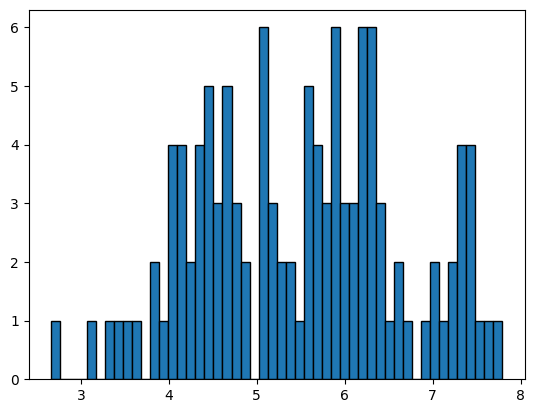

In [71]:
combined2017_df = combined_df[combined_df["Year"]==2017]
combined2017_df
_ = plt.hist(combined2017_df["Life Ladder"], bins = 50, edgecolor="black")

In [ ]:
_ = plt.scatter(combined_df., combined_df.Anomaly)